In [2]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [3]:
# Carregando a base de dados

path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 21.6k/21.6k [00:00<00:00, 13.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


['gym_members_exercise_tracking.csv']

In [4]:
path = '/root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1'
df = pd.read_csv(path + '/gym_members_exercise_tracking.csv')

## Propriedades dos dados:

In [ ]:
# Verificando as linhas iniciais do dataset
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# ---------------------------------------------------------------------------------------------------------------

# Duração dos exercícios:

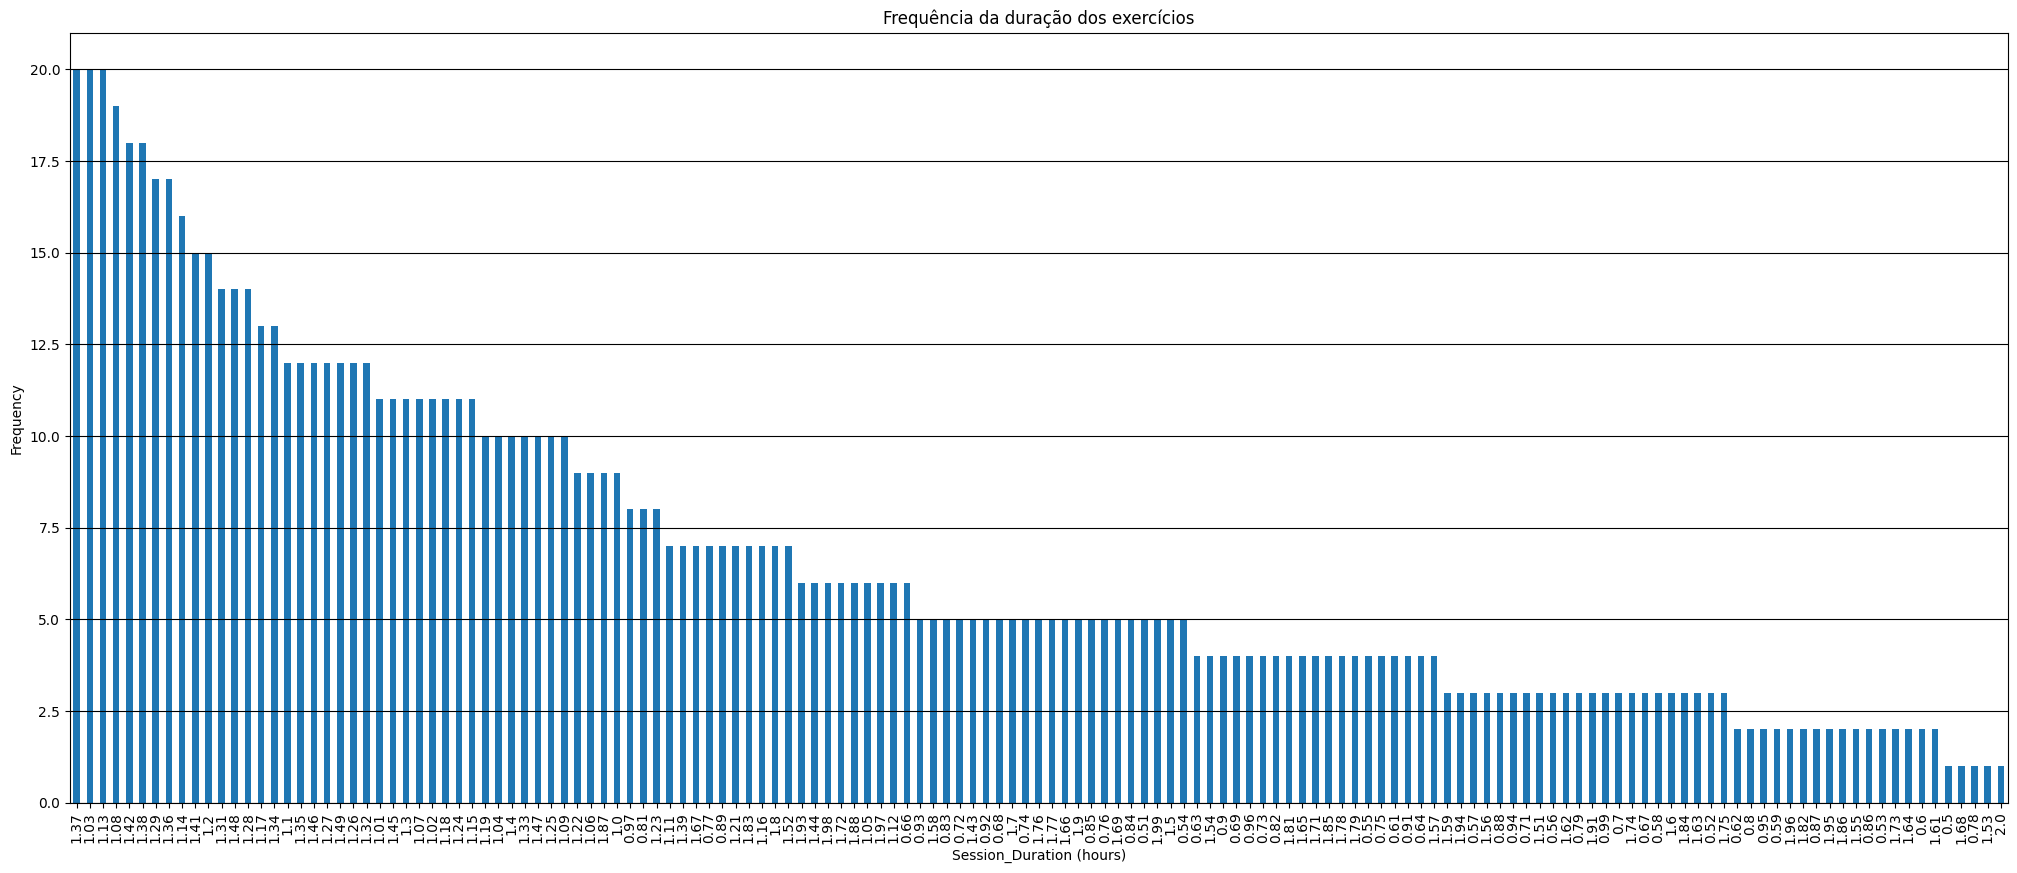

In [ ]:
# Gráfico com a duração dos exercícios
plt.figure(figsize=(25, 10))
plt.title("Frequência da duração dos exercícios")
plt.xlabel("Session_Duration (hours)")
plt.ylabel("Frequency")
df['Session_Duration (hours)'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
qtd_duracao = df['Session_Duration (hours)'].value_counts().reset_index(name='Frequency')
qtd_duracao.columns = ['Session_Duration (hours)', 'Frequency']
qtd_duracao

,Session_Duration (hours),Frequency
0,1.37,20
1,1.03,20
2,1.13,20
3,1.08,19
4,1.42,18
...,...,...
142,0.50,1
143,1.68,1
144,0.78,1
145,1.53,1


# Idades:

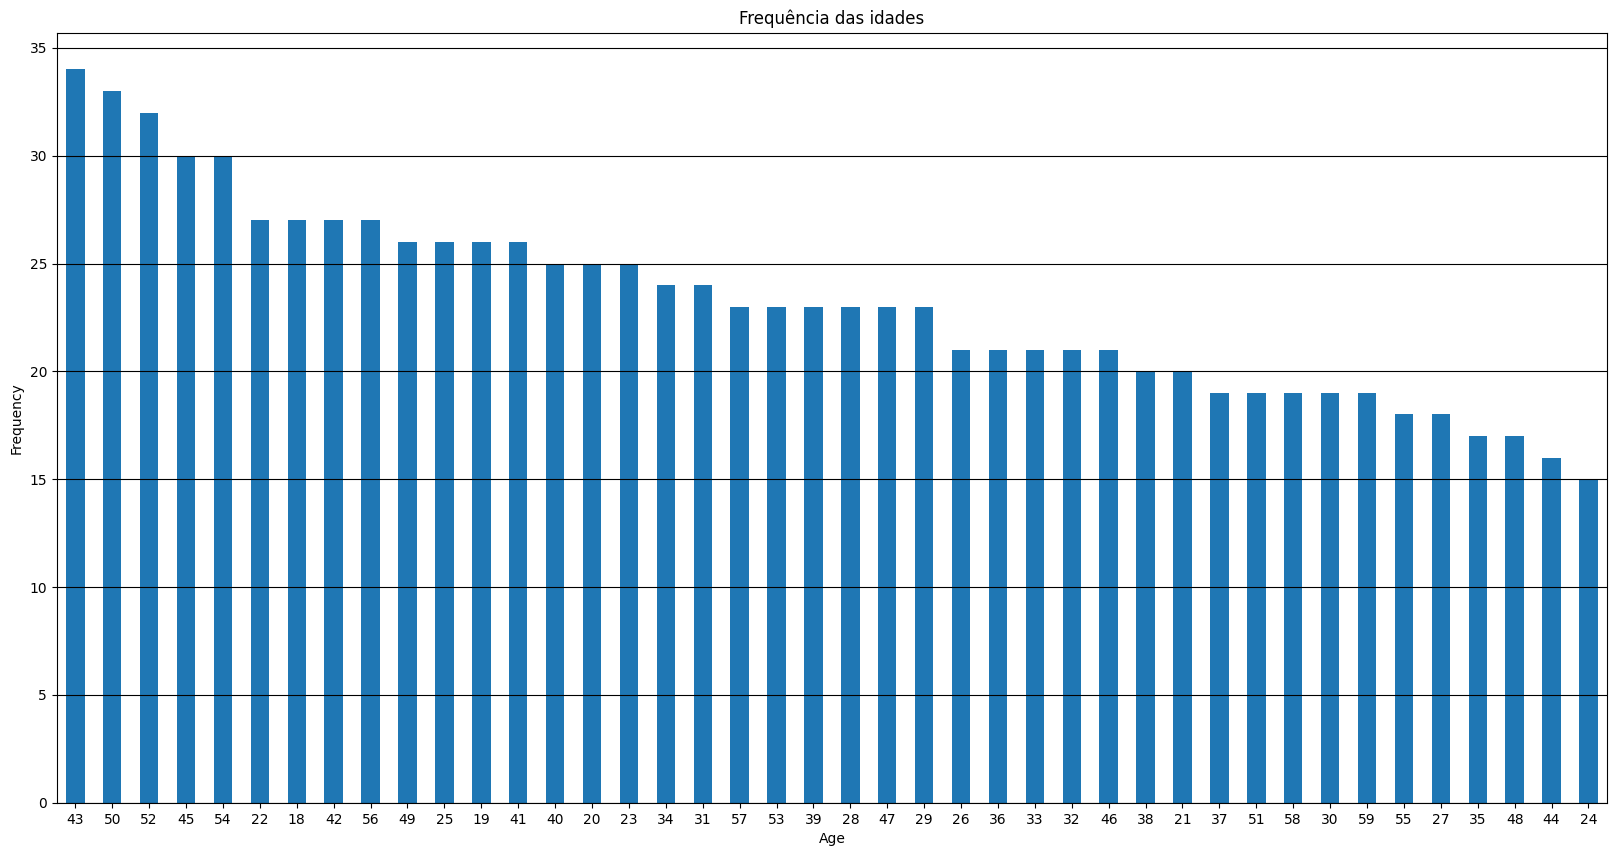

In [ ]:
# Gráfico com as idades
plt.figure(figsize=(20, 10))
plt.title("Frequência das idades")
plt.xlabel("Age")
plt.ylabel("Frequency")
df['Age'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_idade = df['Age'].value_counts().reset_index(name='Frequency')
qtd_idade.columns = ['Age', 'Frequency']
qtd_idade

,Age,Frequency
0,43,34
1,50,33
2,52,32
3,45,30
4,54,30
5,22,27
6,18,27
7,42,27
8,56,27
9,49,26


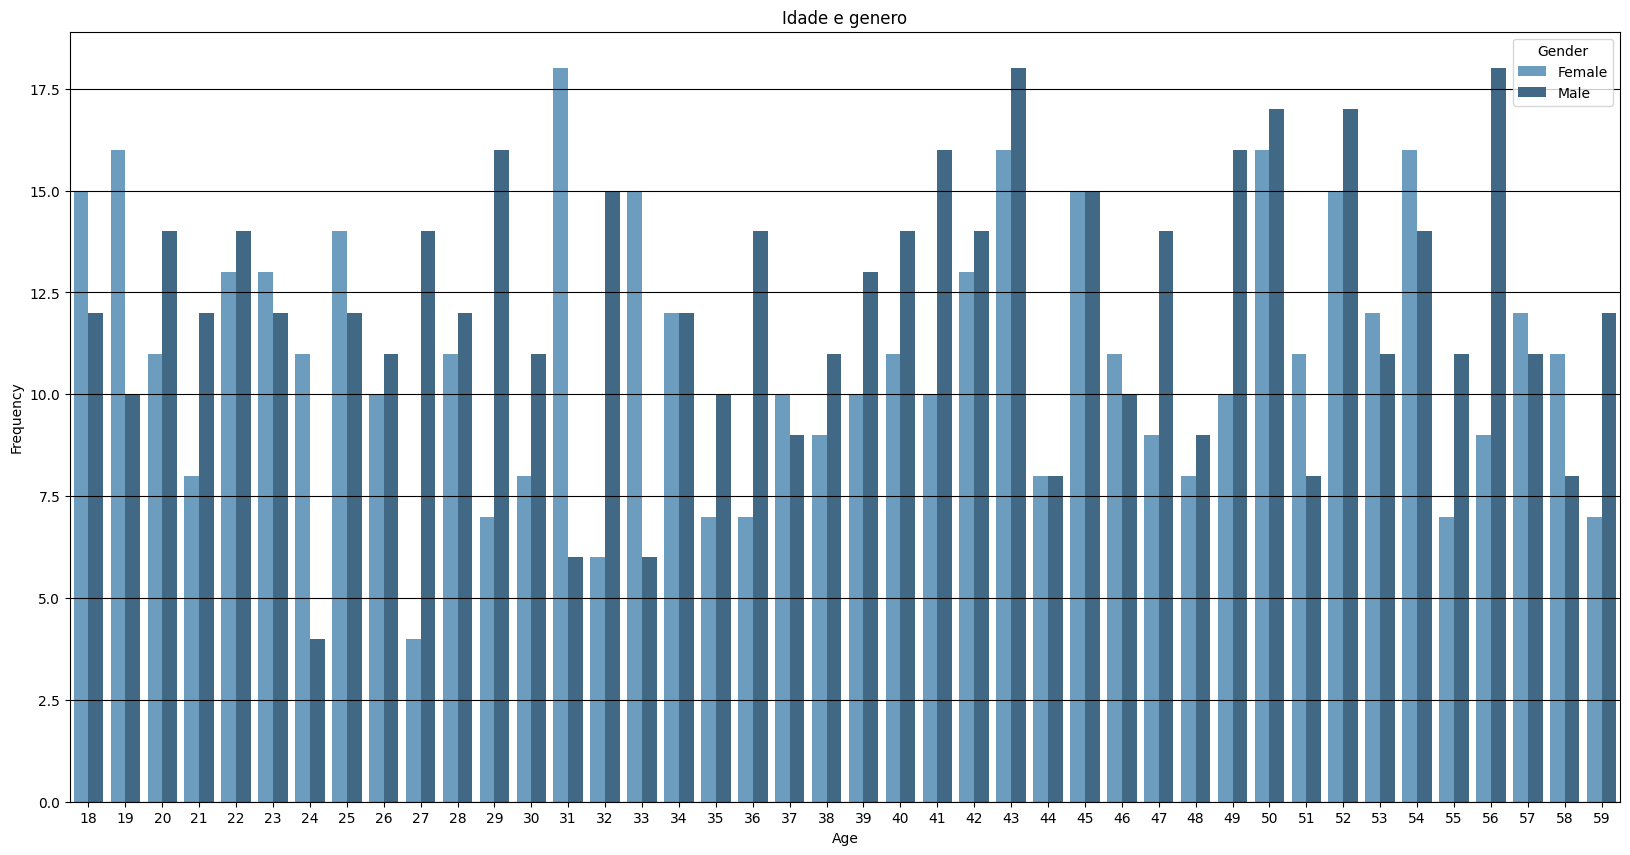

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='Gender', data=df, palette='Blues_d')
plt.title('Idade e genero')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
contagem = df.groupby(['Age', 'Gender']).size().reset_index(name='Frequency')
contagem

,Age,Gender,Frequency
0,18,Female,15
1,18,Male,12
2,19,Female,16
3,19,Male,10
4,20,Female,11
...,...,...,...
79,57,Male,11
80,58,Female,11
81,58,Male,8
82,59,Female,7


# Divididos por genero:

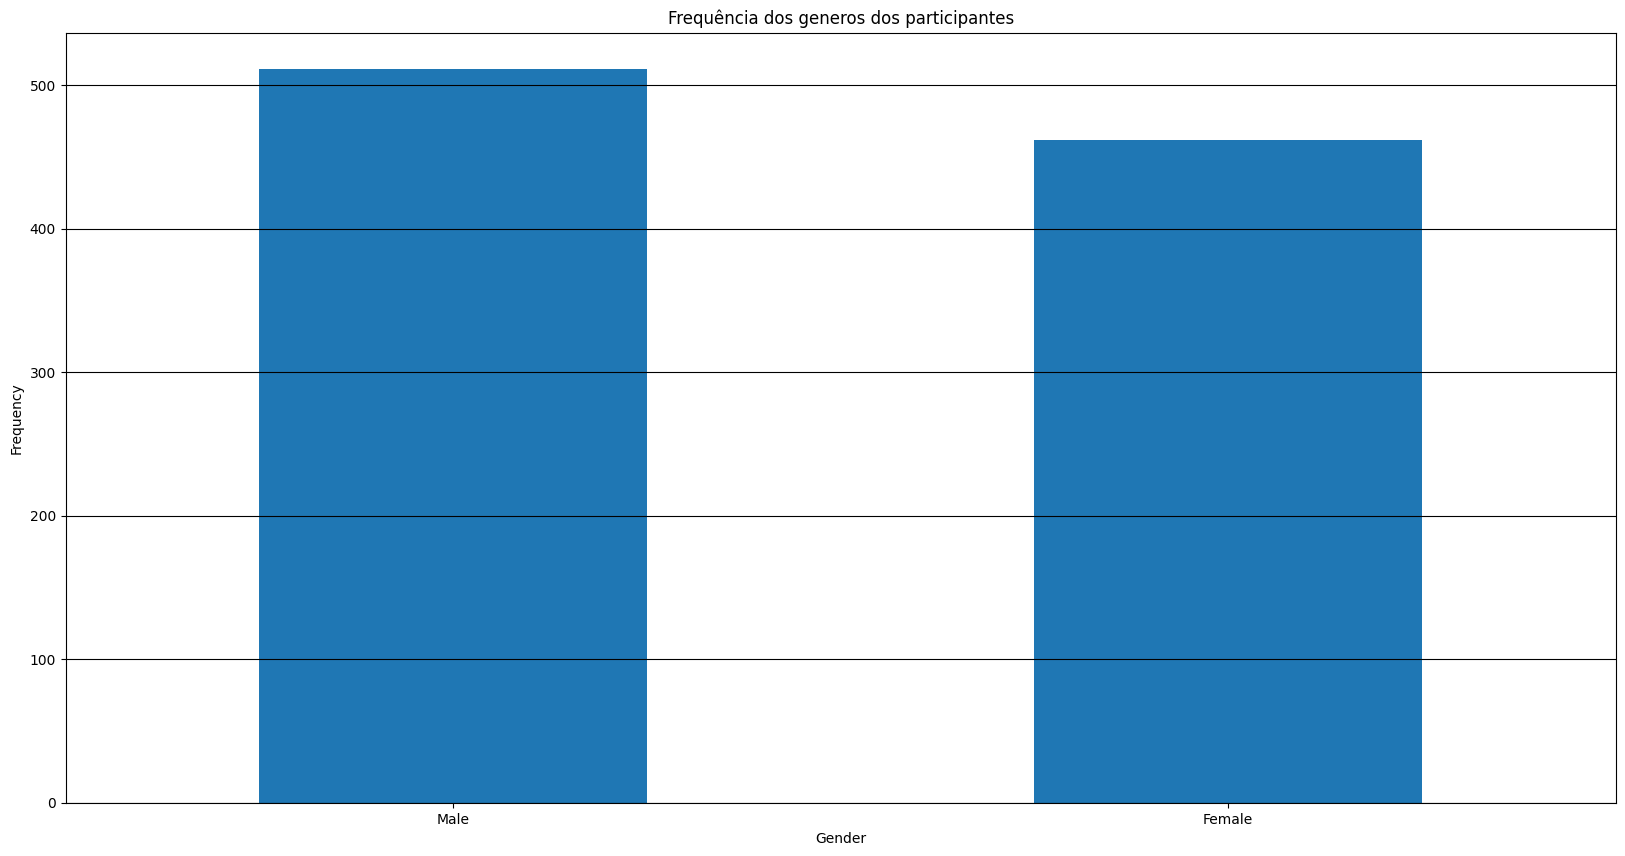

In [5]:
# Gráfico com os gêneros dentre os entrevistados
plt.figure(figsize=(20, 10))
plt.title("Frequência dos generos dos participantes")
plt.xlabel("Gender")
plt.ylabel("Frequency")
df['Gender'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_genero = df['Gender'].value_counts().reset_index(name='Frequency')
qtd_genero.columns = ['Gender', 'Frequency']
qtd_genero

,Gender,Frequency
0,Male,511
1,Female,462


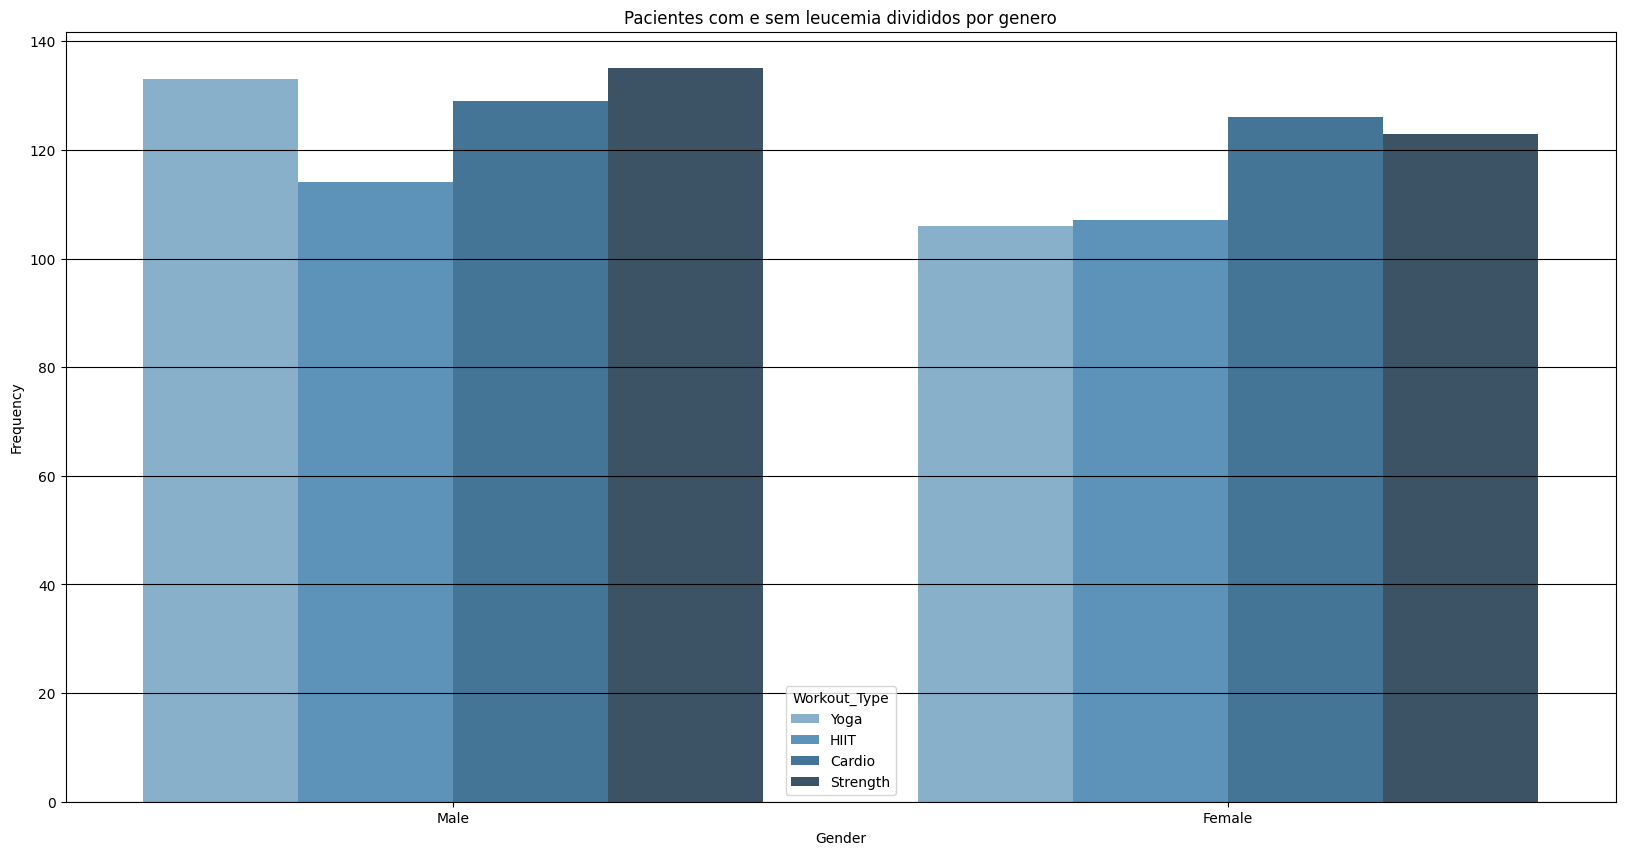

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Gender', hue='Workout_Type', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por genero')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
contagem = df.groupby(['Gender', 'Workout_Type']).size().reset_index(name='Frequency')
contagem

,Gender,Workout_Type,Frequency
0,Female,Cardio,126
1,Female,HIIT,107
2,Female,Strength,123
3,Female,Yoga,106
4,Male,Cardio,129
5,Male,HIIT,114
6,Male,Strength,135
7,Male,Yoga,133


# Divididos pela experiência:



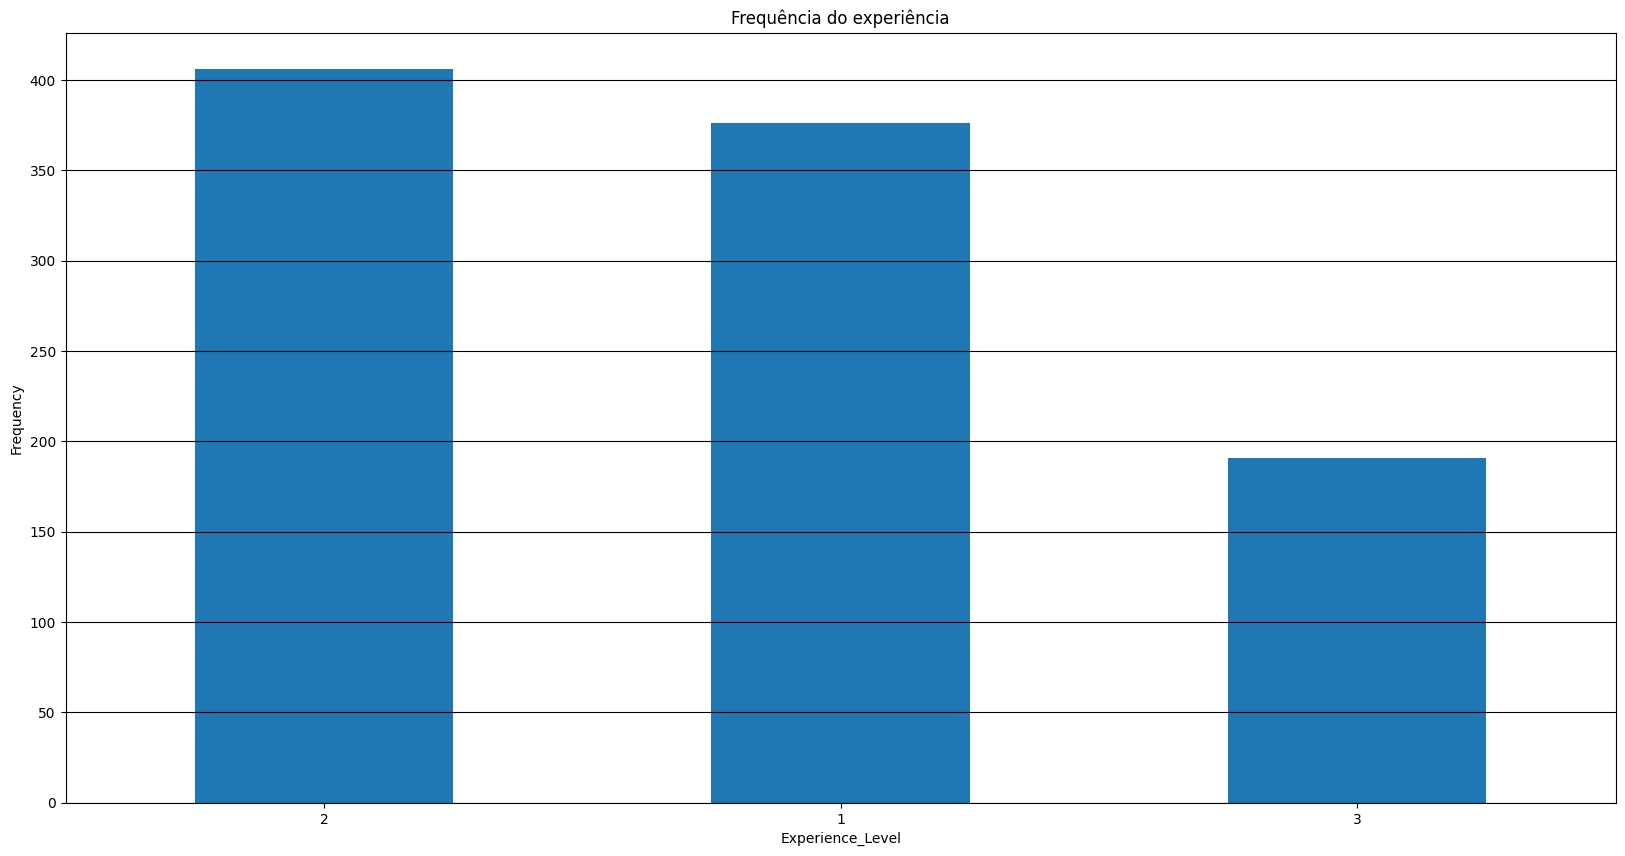

In [ ]:
# Gráfico com as divisões pela experiência
plt.figure(figsize=(20, 10))
plt.title("Frequência do experiência")
plt.xlabel("Experience_Level")
plt.ylabel("Frequency")
df['Experience_Level'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_exp = df['Experience_Level'].value_counts().reset_index(name='Frequency')
qtd_exp.columns = ['Experience_Level', 'Frequency']
qtd_exp

,Experience_Level,Frequency
0,2,406
1,1,376
2,3,191


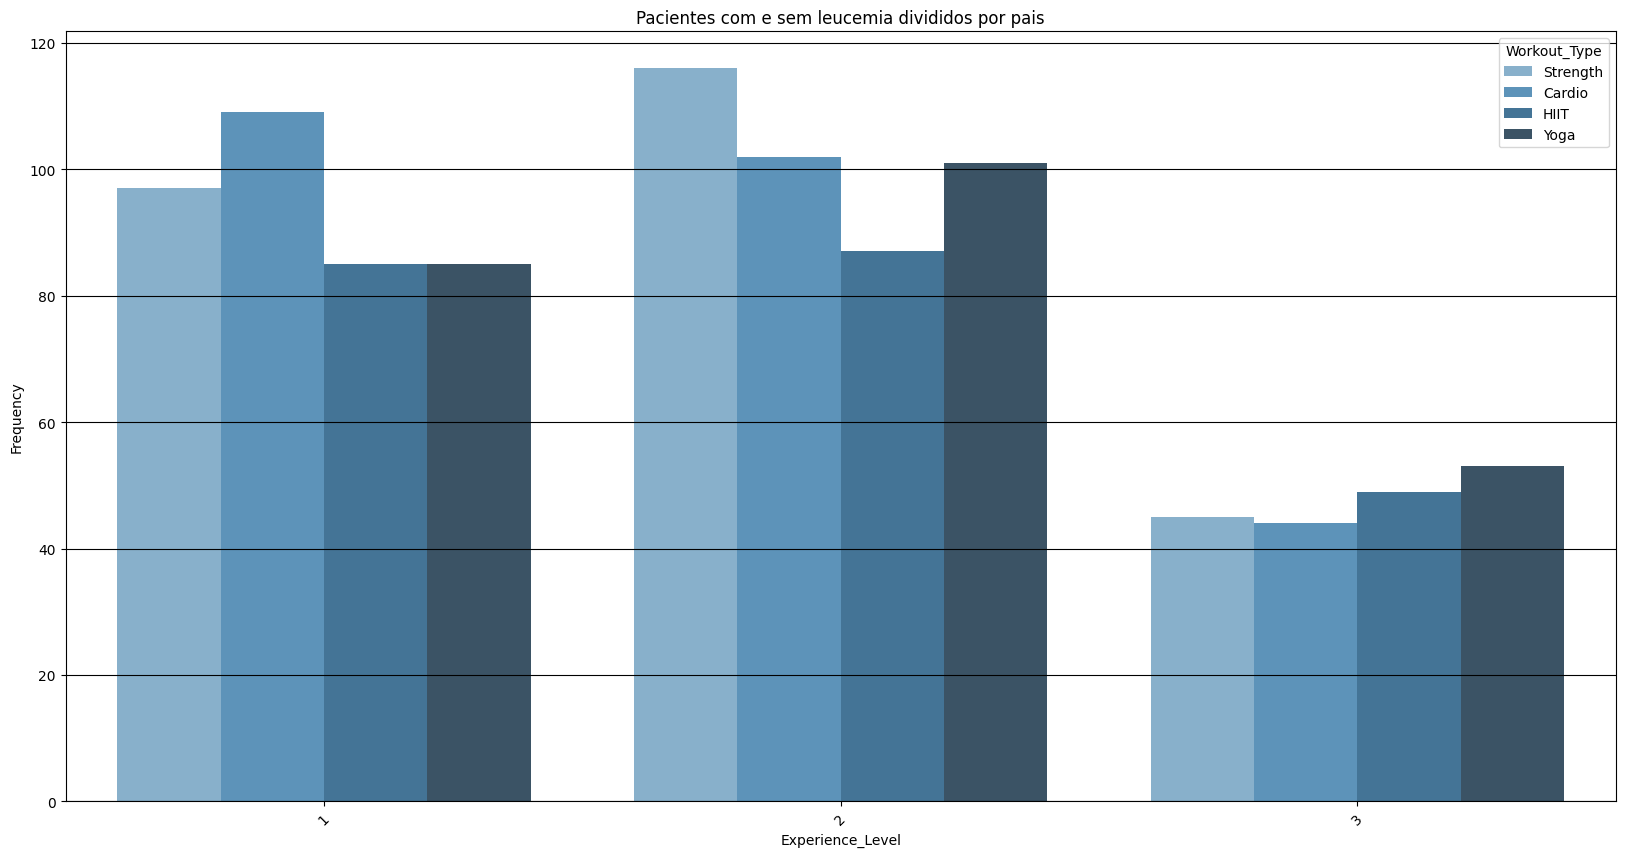

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Experience_Level', hue='Workout_Type', data=df, palette='Blues_d')
plt.title('Pacientes com e sem leucemia divididos por pais')
plt.xlabel('Experience_Level')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=45)
plt.show()

In [ ]:
contagem = df.groupby(['Experience_Level', 'Workout_Type']).size().reset_index(name='Frequency')
contagem

,Experience_Level,Workout_Type,Frequency
0,1,Cardio,109
1,1,HIIT,85
2,1,Strength,97
3,1,Yoga,85
4,2,Cardio,102
5,2,HIIT,87
6,2,Strength,116
7,2,Yoga,101
8,3,Cardio,44
9,3,HIIT,49


# Divididos pela frequência de dias:

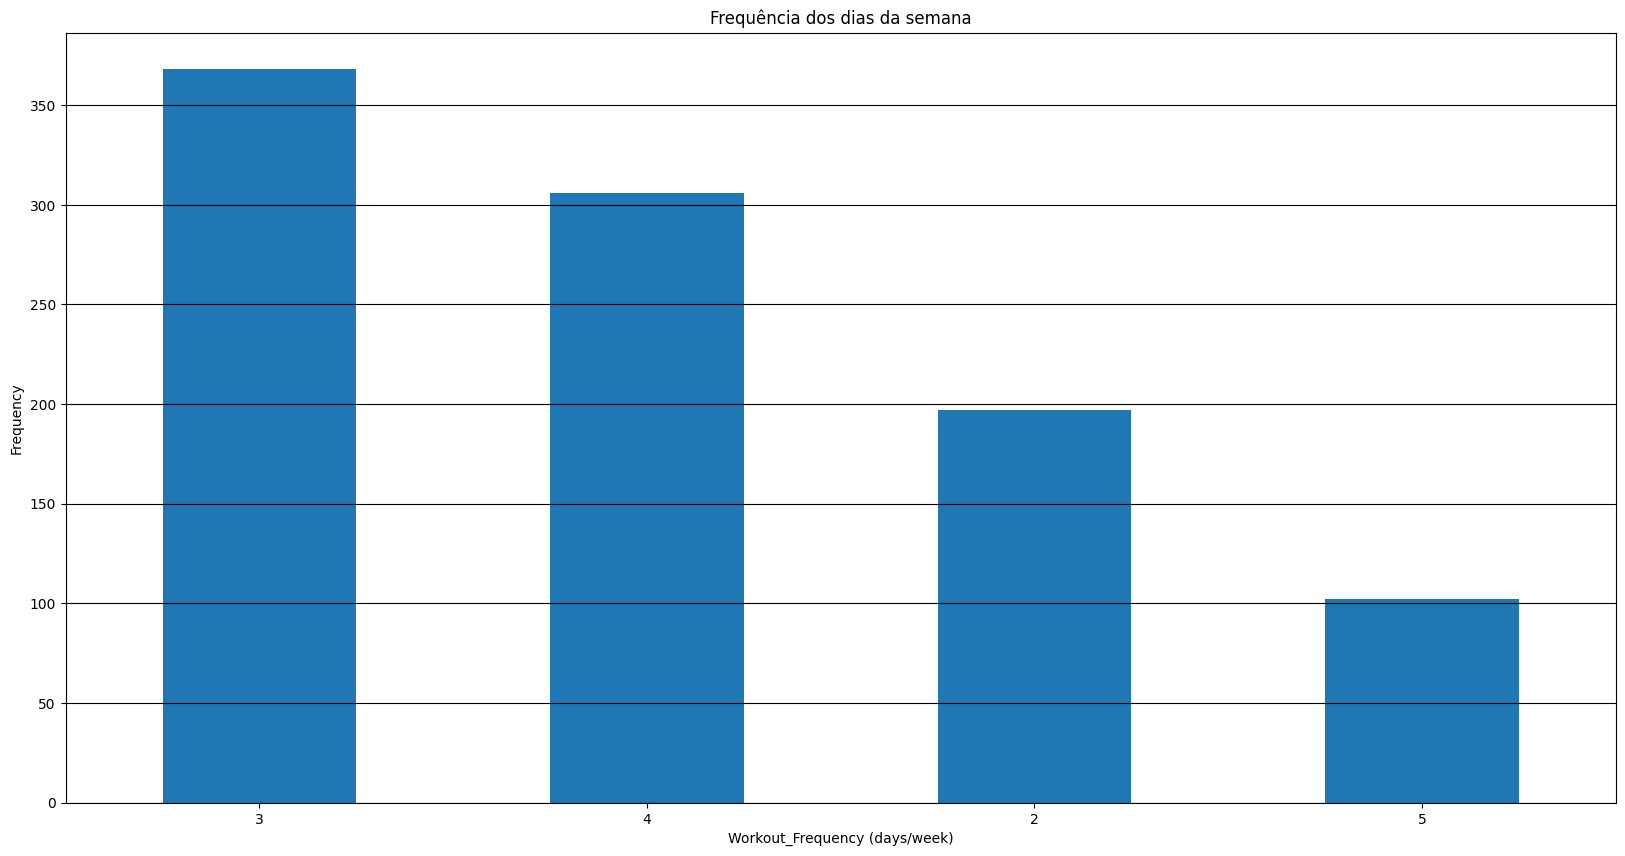

In [ ]:
# Frequência dos participntes
plt.figure(figsize=(20, 10))
plt.title("Frequência dos dias da semana")
plt.xlabel("Workout_Frequency (days/week)")
plt.ylabel("Frequency")
df['Workout_Frequency (days/week)'].value_counts().plot(kind='bar')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
qtd_freq = df['Workout_Frequency (days/week)'].value_counts().reset_index(name='Frequency')
qtd_freq.columns = ['Workout_Frequency (days/week)', 'Frequency']
qtd_freq

,Workout_Frequency (days/week),Frequency
0,3,368
1,4,306
2,2,197
3,5,102


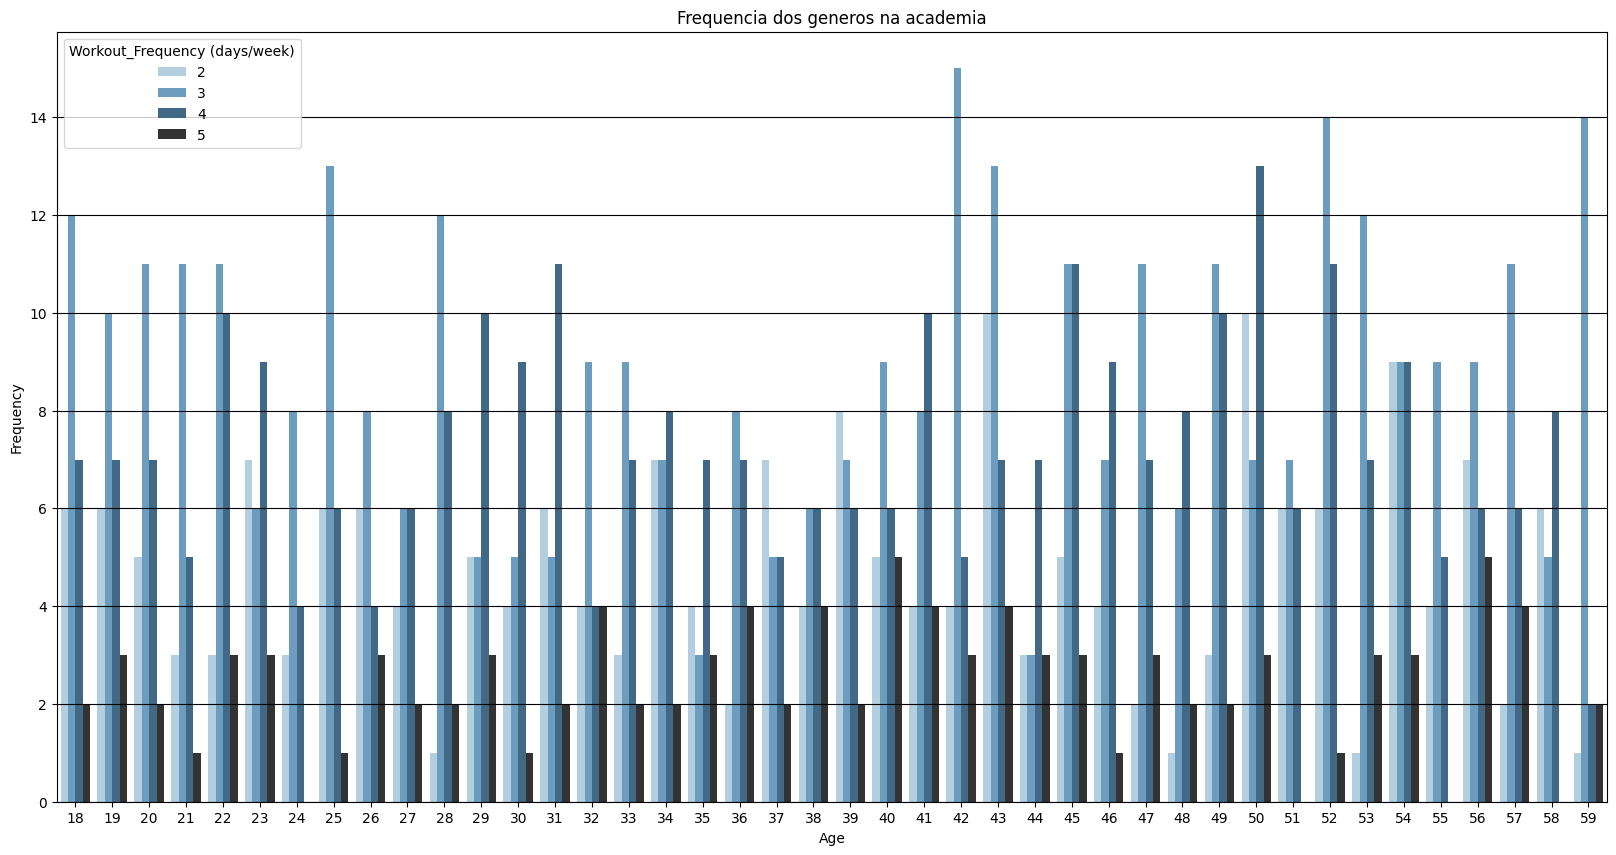

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='Workout_Frequency (days/week)', data=df, palette='Blues_d')
plt.title('Frequencia dos generos na academia')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
plt.show()

In [ ]:
contagem = df.groupby(['Age', 'Workout_Frequency (days/week)']).size().reset_index(name='Frequency')
contagem

,Age,Workout_Frequency (days/week),Frequency
0,18,2,6
1,18,3,12
2,18,4,7
3,18,5,2
4,19,2,6
...,...,...,...
159,58,4,8
160,59,2,1
161,59,3,14
162,59,4,2


# Divididos pelo peso:

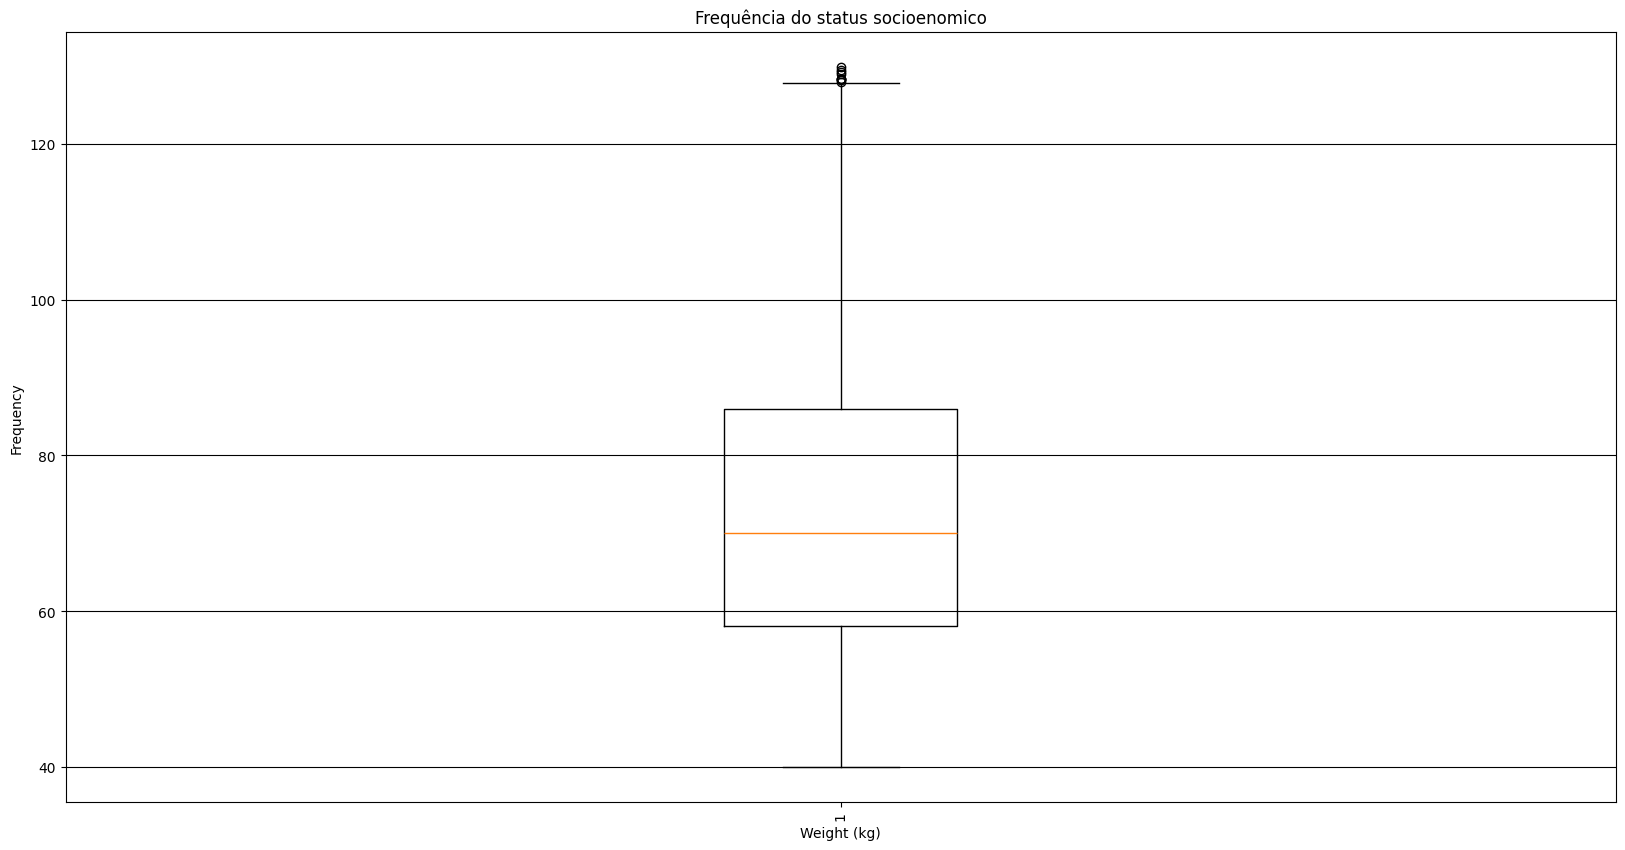

In [17]:
# Gráfico com os pesos dos entrevistados
plt.figure(figsize=(20, 10))
plt.title("Frequência do status socioenomico")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.boxplot(df['Weight (kg)'])
plt.grid(axis='y', color='black')
plt.xticks(rotation=90)
plt.show()

In [21]:
qtd_se = df['Weight (kg)'].value_counts().reset_index(name='Frequency')
qtd_se.columns = ['Weight (kg)', 'Frequency']
qtd_se

,Weight (kg),Frequency
0,57.7,6
1,75.6,6
2,64.3,5
3,50.3,5
4,81.4,5
...,...,...
527,107.0,1
528,105.3,1
529,95.2,1
530,113.6,1


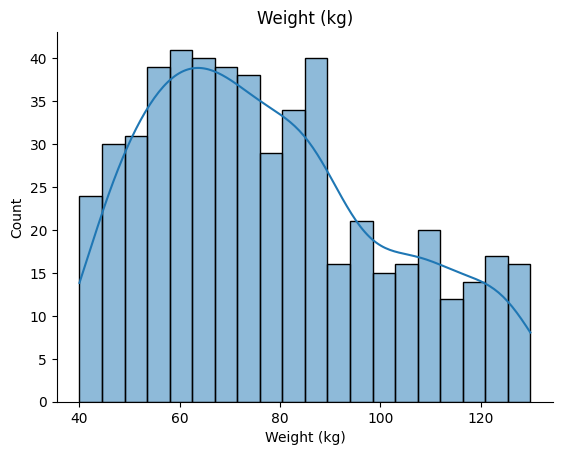

In [20]:
sns.histplot(qtd_se['Weight (kg)'], bins=20, kde=True)
plt.title('Weight (kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# ML

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [28]:
# Pré-processamento
le = LabelEncoder()

categorical_columns = ['Gender', 'Workout_Type']

# Aplicando LabelEncoder para todas as colunas categóricas
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [29]:
# Definindo as variáveis X (features) e y (target)
X = df.drop(['Gender'], axis=1)  # Remover colunas desnecessárias
y = df['Gender']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Árvore de Decisão

In [30]:
# Treinando o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prevendo e avaliando o modelo
y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

Acurácia: 0.958974358974359


# Random Forest

In [31]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

Acurácia: 0.9897435897435898


# **Normalizar os dados para os modelos:**

In [32]:
# Normalizando os dados com StandardScaler
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression

In [35]:
clf = LogisticRegression(random_state=42, max_iter = 3000, solver='liblinear', C=0.1, tol=1e-5)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.9435897435897436
Acurácia média com validação cruzada: 0.931844499586435


# Redes Neurais

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.958974358974359
Acurácia média com validação cruzada: 0.8958395368072788


# **Normalizar os dados para o modelo:**

In [36]:
# Normalizando os dados com MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)

In [37]:
# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prevendo e avaliando o modelo
y_pred = knn.predict(X_test)

# Acurácia
print('Acurácia do KNN:', accuracy_score(y_test, y_pred))

Acurácia do KNN: 0.9179487179487179
